In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

path = '/Users/ali.khan/Documents/src/qcm-analysis'

In [ ]:
#CREATE AYAAT FILE

analysand = 'Lemma_ar' #'FORM_ar'
ayaat = []
morph[analysand] = morph[analysand].fillna('')
for g,v in morph[['sura','aya','word',analysand]].groupby(['sura','aya','word']):
    ayaat.append([*v.sura.unique(),*v.aya.unique(),''.join(v[analysand])])
ayaat = pd.DataFrame(ayaat,columns=['sura','aya','word'])
ayaat1 = []
for g,v in ayaat.groupby(['sura','aya']):
    ayaat1.append([*v.sura.unique(),*v.aya.unique(),' '.join(v.word)])
ayaat = pd.DataFrame(ayaat1,columns=['sura','aya','text'])
ayaat.to_csv('./data/all-ayaat-{}.csv'.format(analysand))

In [2]:
ayalemma = pd.read_csv(path + os.path.sep + 'data' + os.path.sep + 'all-ayaat-Lemma_ar.csv'.format(analysand),
                       index_col=0)
ayalemma

,sura,aya,text
0,1,1,{som {ll~ah r~aHoma`n r~aHiym
1,1,2,Hamod {ll~ah rab~ Ea`lamiyn
2,1,3,r~aHoma`n r~aHiym
3,1,4,ma`lik yawom diyn
4,1,5,<iy~aA Eabada <iy~aA {sotaEiynu
...,...,...,...
6231,114,2,malik n~aAs
6232,114,3,<ila`h n~aAs
6233,114,4,min $ar~ wasowaAs xan~aAs
6234,114,5,{l~a*iY wasowasa fiY Sador n~aAs


In [3]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [4]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    print(vectors)
    return cosine_similarity(vectors)
    
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [ ]:
# -*- coding: utf-8 -*-
from sklearn.feature_extraction.text import TfidfVectorizer
X_test = [ayalemma.iloc[5171].text, ayalemma.iloc[1267].text]
stopword = [u' '] 

patt = r"(?u)[a-zA-Z0-9$&+`%\"\',:;=?@#|\{}<>~.^*()%!-_!]+"

tfidf = TfidfVectorizer(token_pattern=patt,stop_words=stopword,lowercase=False,strip_accents='unicode')
weight = tfidf.fit_transform (X_test) .toarray () 
vocab = tfidf.get_feature_names ()
idf = tfidf.idf_ 

cosine_similarity(weight)[1][0]

In [9]:
weight = tfidf.fit_transform (ayalemma.text.fillna('').values.tolist()).toarray ()
vocab = tfidf.get_feature_names ()
idf = tfidf.idf_
#print(vocab)
print(weight)
print(tfidf.idf_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[8.12881666 7.94649511 4.41037841 ... 7.54103    9.0451074  9.0451074 ]


In [10]:
morph = pd.read_csv(path + os.path.sep + 'ref' + os.path.sep + 'quran-morphology-final.csv', index_col=0)

In [12]:
err = set(vocab)-set(morph.Lemma.fillna('').unique().tolist())
missing = set(morph.Lemma.fillna('').unique().tolist())-set(vocab)
print('Lemmas in Morphology',len(morph.Lemma.fillna('').unique().tolist()))
print('Vocab',len(vocab))
print('Errors in Vocab',len(err))
print('Missing in Vocab',len(missing))
set(morph.Lemma.fillna('').unique().tolist()) & err
missing
#morph[morph.Lemma.fillna('').str.contains('kul~amaAmaA')]

Lemmas in Morphology 4818
Vocab 4839
Errors in Vocab 23
Missing in Vocab 2


{'', 'r~ub'}

In [13]:
test = pd.DataFrame(weight)
testcos = pd.DataFrame(cosine_similarity(test,test))
test

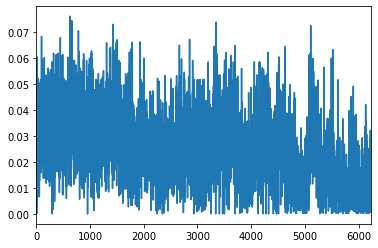

In [15]:
testcos.mean().plot()

In [17]:
s = testcos.unstack()
so = s.sort_values(kind="quicksort")
sos = pd.DataFrame(so[so != 0]).reset_index()
sos = sos[sos.level_0 != sos.level_1]
sos

,level_0,level_1,0
0,2686,2821,0.001751
1,2821,2686,0.001751
2,499,239,0.001918
3,239,499,0.001918
4,99,2851,0.001997
...,...,...,...
17539180,3058,3095,1.000000
17539181,3058,3076,1.000000
17539183,3056,3109,1.000000
17539478,1031,1044,1.000000


In [18]:
sos['sorted_row'] = [sorted([a,b]) for a,b in zip(sos.level_0, sos.level_1)]
sos['sorted_row'] = sos['sorted_row'].astype(str)
sos.drop_duplicates(subset=['sorted_row'], inplace=True)
sos

,level_0,level_1,0,sorted_row
0,2686,2821,0.001751,"[2686, 2821]"
2,499,239,0.001918,"[239, 499]"
4,99,2851,0.001997,"[99, 2851]"
6,2851,398,0.002000,"[398, 2851]"
8,2825,499,0.002002,"[499, 2825]"
...,...,...,...,...
17539140,3040,3058,1.000000,"[3040, 3058]"
17539144,3038,3074,1.000000,"[3038, 3074]"
17539156,3056,3074,1.000000,"[3056, 3074]"
17539163,3076,3058,1.000000,"[3058, 3076]"


In [19]:
sos.columns = ['index','aya2','cosine_similarity','temp']
sos = sos.drop('temp',1)
sos

,index,aya2,cosine_similarity
0,2686,2821,0.001751
2,499,239,0.001918
4,99,2851,0.001997
6,2851,398,0.002000
8,2825,499,0.002002
...,...,...,...
17539140,3040,3058,1.000000
17539144,3038,3074,1.000000
17539156,3056,3074,1.000000
17539163,3076,3058,1.000000


In [103]:
ayaat = pd.read_csv(path + os.path.sep + 'data' + os.path.sep + 'all-ayaat-FORM_ar.csv', index_col=0)
ayaat

,sura,aya,text
0,1,1,بِسْمِ ٱللَّهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ
1,1,2,ٱلْحَمْدُ لِلَّهِ رَبِّ ٱلْعَٰلَمِينَ
2,1,3,ٱلرَّحْمَٰنِ ٱلرَّحِيمِ
3,1,4,مَٰلِكِ يَوْمِ ٱلدِّينِ
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
...,...,...,...
6231,114,2,مَلِكِ ٱلنَّاسِ
6232,114,3,إِلَٰهِ ٱلنَّاسِ
6233,114,4,مِن شَرِّ ٱلْوَسْوَاسِ ٱلْخَنَّاسِ
6234,114,5,ٱلَّذِى يُوَسْوِسُ فِى صُدُورِ ٱلنَّاسِ


In [104]:
ayaat['numwordsaya'] = ayaat['text'].apply(lambda x: len(x.split(' ')))
ayaat.numwordsaya.mean()

12.41661321359846

In [106]:
df = sos[sos.cosine_similarity>=0.5].merge(ayaat.reset_index(),on='index',how='left') \
    .rename(columns={'text':'textaya1'}) \
    .merge(ayalemma,on=['sura','aya'],how='left') \
    .rename(columns={'text':'lemmaaya1'}) \
    .rename(columns={'index':'aya1ix','aya2':'index','sura':'sura1','aya':'aya1'}) \
    .merge(ayaat.reset_index(),on='index',how='left') \
    .rename(columns={'text':'textaya2'}) \
    .merge(ayalemma,on=['sura','aya'],how='left') \
    .rename(columns={'text':'lemmaaya2'}) \
    .rename(columns={'index':'aya2ix','sura':'sura2','aya':'aya2'})
df
if False:
    df.sort_values('cosine_similarity',ascending=False) \
        .to_csv(path+os.path.sep+'data'+os.path.sep+'cosine_similarity_all_ayaat+0.5.csv')
if False:
    df[df.cosine_similarity>=1].sort_values('aya1ix',ascending=True) \
        .to_csv(path+os.path.sep+'data'+os.path.sep+'cosine_similarity_all_ayaat+1.csv')
if False:
    df=df.dropna()
    for col in ['sura1', 'aya1', 'numwordsaya_x', 'sura2', 'aya2', 'numwordsaya_y']:
        df[col] = df[col].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 0 to 3901
Data columns (total 13 columns):
aya1ix               3902 non-null int64
aya2ix               3902 non-null int64
cosine_similarity    3902 non-null float64
sura1                3902 non-null int64
aya1                 3902 non-null int64
textaya1             3902 non-null object
numwordsaya_x        3902 non-null int64
lemmaaya1            3902 non-null object
sura2                3902 non-null int64
aya2                 3902 non-null int64
textaya2             3902 non-null object
numwordsaya_y        3902 non-null int64
lemmaaya2            3902 non-null object
dtypes: float64(1), int64(8), object(4)
memory usage: 426.8+ KB


In [107]:
threshold = .5

In [108]:
unique_identical = set(df[df.cosine_similarity>=threshold]['lemmaaya1'].unique().tolist()) \
                        .union(set(df[df.cosine_similarity>=threshold]['lemmaaya2'].unique().tolist()))
unique_identical = pd.DataFrame(unique_identical)
len(unique_identical)
#unique_identical.to_csv(path+os.path.sep+'data'+os.path.sep+'all_identical_120_ayaat.csv')

2517

In [110]:
b = df[['aya1ix', 'aya2ix', 'cosine_similarity', 'sura1', 'aya1', 'sura2',
       'aya2', 'textaya1', 'textaya2', 'lemmaaya1', 'lemmaaya2']]

b = b[b.cosine_similarity>=threshold]#.drop('cosine_similarity',1)

b.cosine_similarity = b.cosine_similarity.round(2).astype(str)

b.lemmaaya1 = b.lemmaaya1.str.strip()
b.lemmaaya2 = b.lemmaaya2.str.strip()
if False:
    c = b[b.lemmaaya1!=b.lemmaaya2]
    b = b[b.lemmaaya1==b.lemmaaya2]
#b = b.drop('lemmaaya2',1)
b['aya1ix'] = b['aya1ix'].astype(str)
b['aya2ix'] = b['aya2ix'].astype(str)
b['ixpair'] = b['aya1ix']+','+b['aya2ix']

b['sa1'] = b[['sura1','aya1']].astype(str).agg(':'.join,axis=1)
b['sa2'] = b[['sura2','aya2']].astype(str).agg(':'.join,axis=1)
b['sapair'] = b['sa1']+','+b['sa2']
b = b.drop(['sa1','sa2'],1)
b = b.drop(['aya1ix','aya2ix'],1)

#c = b[b.lemmaaya2.isin(set(b.lemmaaya2.unique()) - set(b.lemmaaya1.unique()))]

b = b.groupby('lemmaaya1').agg('|'.join).reset_index()
#c = c.groupby('lemmaaya2').agg('|'.join).reset_index()

if False:
    b.sort_values(['textaya1','sura1','aya1','cosine_similarity'])\
        .to_csv(path+os.path.sep+'data'+os.path.sep+'cosine_similarity_1694_ayaat+'+str(threshold)+'_sapair.csv')
    
#b = b.append(c, ignore_index=True)#.drop('ixpair',1)
b['lemmaaya2'].loc[b[b.lemmaaya1 == b.lemmaaya2]['lemmaaya2'].index] = 'same as lemmaaya1'
b['textaya2'].loc[b[b.textaya1 == b.textaya2]['textaya2'].index] = 'same as textaya1'
b[b.textaya2.str.contains('same')]
b

,lemmaaya1,cosine_similarity,textaya1,textaya2,lemmaaya2,ixpair,sapair
0,$aAkir niEomap {jotabaY` hadaY <ilaY` Sira`T m...,0.5|0.63,شَاكِرًا لِّأَنْعُمِهِ ٱجْتَبَىٰهُ وَهَدَىٰهُ ...,وَإِنَّكَ لَتَدْعُوهُمْ إِلَىٰ صِرَٰطٍ مُّسْتَ...,<in~ daEaA <ilaY` Sira`T m~usotaqiym|hadaY Sir...,"2021,2745|2021,560","16:121,23:73|16:121,4:68"
1,$ahida muqar~abuwn,0.55|0.67,يَشْهَدُهُ ٱلْمُقَرَّبُونَ|يَشْهَدُهُ ٱلْمُقَر...,فَأَمَّآ إِن كَانَ مِنَ ٱلْمُقَرَّبِينَ|أُو۟ل...,>am~aA <in kaAna min muqar~abuwn|>uwla`^}ik mu...,"5868,5066|5868,4989","83:21,56:88|83:21,56:11"
2,$amos DuHFY,0.78,وَٱلشَّمْسِ وَضُحَىٰهَا,وَٱلضُّحَىٰ,DuHFY,"6043,6079","91:1,93:1"
3,$amos qamar HusobaAn,0.59,ٱلشَّمْسُ وَٱلْقَمَرُ بِحُسْبَانٍ,وَجُمِعَ ٱلشَّمْسُ وَٱلْقَمَرُ,jamaEa $amos qamar,"4905,5559","55:5,75:9"
4,'aAmana {ll~ah rasuwl Eaz~aru tuwaq~iru sab~aH...,0.67,لِّتُؤْمِنُوا۟ بِٱللَّهِ وَرَسُولِهِۦ وَتُعَزّ...,وَسَبِّحُوهُ بُكْرَةً وَأَصِيلًا,sab~aHa bukorap >aSiyl,"4591,3574","48:9,33:42"
...,...,...,...,...,...,...,...
1740,{t~axa*a min duwn {ll~ah <ila`h laEal~ naSara,0.53,وَٱتَّخَذُوا۟ مِن دُونِ ٱللَّهِ ءَالِهَةً لَّع...,وَٱتَّخَذُوا۟ مِن دُونِ ٱللَّهِ ءَالِهَةً لِّي...,{t~axa*a min duwn {ll~ah <ila`h kaAna Eiz~,"3778,2330","36:74,19:81"
1741,{t~axa*a yamiyn jun~ap Sad~a Ean sabiyl {ll~ah...,0.75,ٱتَّخَذُوٓا۟ أَيْمَٰنَهُمْ جُنَّةً فَصَدُّوا۟ ...,ٱتَّخَذُوٓا۟ أَيْمَٰنَهُمْ جُنَّةً فَصَدُّوا۟ ...,{t~axa*a yamiyn jun~ap Sad~a Ean sabiyl {ll~ah...,"5119,5189","58:16,63:2"
1742,{xofiDo janaAH man {t~abaEa min mu&omin,0.56,وَٱخْفِضْ جَنَاحَكَ لِمَنِ ٱتَّبَعَكَ مِنَ ٱلْ...,لَا تَمُدَّنَّ عَيْنَيْكَ إِلَىٰ مَا مَتَّعْنَ...,laA mad~a Eayon <ilaY` maA m~at~aEo zawoj min...,"3146,1889","26:215,15:88"
1743,{xotalafa Hizob min bayon wayol {l~a*iY Zalama...,0.65,فَٱخْتَلَفَ ٱلْأَحْزَابُ مِنۢ بَيْنِهِمْ فَوَي...,فَٱخْتَلَفَ ٱلْأَحْزَابُ مِنۢ بَيْنِهِمْ فَوَي...,{xotalafa Hizob min bayon wayol {l~a*iY kafara...,"4389,2286","43:65,19:37"


In [112]:
b['pair_count']=b['ixpair'].apply(lambda x: len(x.split('|')))
b = b.sort_values('pair_count',ascending=False)
b = b[['cosine_similarity','pair_count','sapair','textaya1','textaya2','ixpair','lemmaaya1','lemmaaya2']]
b

,cosine_similarity,pair_count,sapair,textaya1,textaya2,ixpair,lemmaaya1,lemmaaya2
384,0.65|0.65|0.65|0.65|0.65|0.65|0.65|0.65|0.65|0...,480,"55:61,53:55|55:57,53:55|55:38,53:55|55:49,53:5...",فَبِأَىِّ ءَالَآءِ رَبِّكُمَا تُكَذِّبَانِ|فَ...,فَبِأَىِّ ءَالَآءِ رَبِّكَ تَتَمَارَىٰ|فَبِأَ...,"4961,4838|4957,4838|4938,4838|4949,4838|4928,4...",>aY~ 'aAlaA^' rab~ ka*~aba,>aY~ 'aAlaA^' rab~ tamaAra|>aY~ 'aAlaA^' rab~ ...
1534,1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1....,66,"77:49,77:47|77:49,83:10|77:49,77:45|77:15,52:1...",وَيْلٌ يَوْمَئِذٍ لِّلْمُكَذِّبِينَ|وَيْلٌ يَو...,وَيْلٌ يَوْمَئِذٍ لِّلْمُكَذِّبِينَ|وَيْلٌ يَو...,"5670,5668|5670,5857|5670,5666|5636,4745|5636,5...",wayol yawoma}i* m~uka*~ibiyn,wayol yawoma}i* m~uka*~ibiyn|wayol yawoma}i* m...
1738,0.51|0.51|0.51|0.51|0.51|0.52|0.52|0.52|0.52|0...,43,"26:144,33:1|26:179,33:1|26:108,33:1|26:131,33:...",فَٱتَّقُوا۟ ٱللَّهَ وَأَطِيعُونِ|فَٱتَّقُوا۟ ٱ...,يَٰٓأَيُّهَا ٱلنَّبِىُّ ٱتَّقِ ٱللَّهَ وَلَا ت...,"3075,3533|3110,3533|3039,3533|3062,3533|3081,3...",{t~aqaY` {ll~ah >aTaAEa,>ay~uhaA n~abiY~ {t~aqaY` {ll~ah laA >aTaAEa k...
304,0.63|0.63|0.63|0.63|0.63|0.63|0.63|0.63|0.64|0...,41,"26:122,36:5|26:159,36:5|26:9,36:5|26:175,36:5|...",وَإِنَّ رَبَّكَ لَهُوَ ٱلْعَزِيزُ ٱلرَّحِيمُ|و...,تَنزِيلَ ٱلْعَزِيزِ ٱلرَّحِيمِ|تَنزِيلَ ٱلْعَز...,"3053,3709|3090,3709|2940,3709|3106,3709|3035,3...",<in~ rab~ Eaziyz r~aHiym,tanziyl Eaziyz r~aHiym|tanziyl Eaziyz r~aHiym|...
701,0.5|0.52|0.53|0.53|0.53|0.54|0.54|0.54|0.54|0....,34,"1:6,37:23|37:118,43:43|37:118,7:16|1:6,7:16|1:...",ٱهْدِنَا ٱلصِّرَٰطَ ٱلْمُسْتَقِيمَ|وَهَدَيْنَٰ...,مِن دُونِ ٱللَّهِ فَٱهْدُوهُمْ إِلَىٰ صِرَٰطِ ...,"5,3810|3905,4367|3905,969|5,969|5,393|3905,667...",hadaY Sira`T m~usotaqiym,min duwn {ll~ah hadaY <ilaY` Sira`T jaHiym|{so...
...,...,...,...,...,...,...,...,...
1000,0.59,1,"4:155,2:88",فَبِمَا نَقْضِهِم مِّيثَٰقَهُمْ وَكُفْرِهِم بِ...,وَقَالُوا۟ قُلُوبُنَا غُلْفٌۢ بَل لَّعَنَهُمُ ...,"647,94",maA naqoD m~iyva`q kufor 'aAyap {ll~ah qatol n...,qaAla qalob gulof bal laEana {ll~ah kufor qali...
1001,0.6,1,"36:49,38:15",مَا يَنظُرُونَ إِلَّا صَيْحَةً وَٰحِدَةً تَأْخ...,وَمَا يَنظُرُ هَٰٓؤُلَآءِ إِلَّا صَيْحَةً وَٰ...,"3753,3984",maA n~aZara <il~aA SayoHap wa`Hidap >axa*a {x...,maA n~aZara ha`*aA <il~aA SayoHap wa`Hidap maA...
381,0.83,1,"64:12,5:92",وَأَطِيعُوا۟ ٱللَّهَ وَأَطِيعُوا۟ ٱلرَّسُولَ ف...,وَأَطِيعُوا۟ ٱللَّهَ وَأَطِيعُوا۟ ٱلرَّسُولَ و...,"5210,760",>aTaAEa {ll~ah >aTaAEa rasuwl <in tawal~aY` <i...,>aTaAEa {ll~ah >aTaAEa rasuwl yaHo*aru <in taw...
378,0.91,1,"56:8,90:18",فَأَصْحَٰبُ ٱلْمَيْمَنَةِ مَآ أَصْحَٰبُ ٱلْمَ...,أُو۟لَٰٓئِكَ أَصْحَٰبُ ٱلْمَيْمَنَةِ,"4986,6040",>aSoHa`b mayomanap maA >aSoHa`b mayomanap,>uwla`^}ik >aSoHa`b mayomanap


In [113]:
def flatten(t):
    return [item for sublist in t for item in sublist]
b['unique_aya']=b['ixpair'].apply(lambda x: set(flatten([y.split(',') for y in x.split('|')])))
b['unique_count'] = b['unique_aya'].apply(lambda x: len(x))
b['unique_suraaya']=b['sapair'].apply(lambda x: set(flatten([y.split(',') for y in x.split('|')])))
b['cosine_similarity']=b['cosine_similarity'].apply(lambda x: set(x.split('|')))
b['lemmaaya1']=b['lemmaaya1'].apply(lambda x: set(x.split('|')))
b['lemmaaya2']=b['lemmaaya2'].apply(lambda x: set(x.split('|')))
b['textaya1']=b['textaya1'].apply(lambda x: set(x.split('|')))
b['textaya2']=b['textaya2'].apply(lambda x: set(x.split('|')))
b = b[['cosine_similarity','pair_count','unique_count','unique_suraaya','unique_aya','sapair',
       'textaya1','textaya2','ixpair','lemmaaya1','lemmaaya2']]
b

,cosine_similarity,pair_count,unique_count,unique_suraaya,unique_aya,sapair,textaya1,textaya2,ixpair,lemmaaya1,lemmaaya2
384,"{0.65, 1.0}",480,32,"{55:51, 55:28, 55:47, 55:63, 55:69, 55:67, 55:...","{4961, 4923, 4975, 4969, 4963, 4918, 4971, 495...","55:61,53:55|55:57,53:55|55:38,53:55|55:49,53:5...",{فَبِأَىِّ ءَالَآءِ رَبِّكُمَا تُكَذِّبَانِ},"{فَبِأَىِّ ءَالَآءِ رَبِّكَ تَتَمَارَىٰ, فَبِ...","4961,4838|4957,4838|4938,4838|4949,4838|4928,4...",{>aY~ 'aAlaA^' rab~ ka*~aba},"{>aY~ 'aAlaA^' rab~ ka*~aba, >aY~ 'aAlaA^' rab..."
1534,{1.0},66,12,"{77:19, 77:24, 77:37, 77:47, 77:45, 77:28, 83:...","{5645, 4745, 5636, 5655, 5857, 5640, 5649, 567...","77:49,77:47|77:49,83:10|77:49,77:45|77:15,52:1...","{فَوَيْلٌ يَوْمَئِذٍ لِّلْمُكَذِّبِينَ, وَيْلٌ...","{فَوَيْلٌ يَوْمَئِذٍ لِّلْمُكَذِّبِينَ, وَيْلٌ...","5670,5668|5670,5857|5670,5666|5636,4745|5636,5...",{wayol yawoma}i* m~uka*~ibiyn},{wayol yawoma}i* m~uka*~ibiyn}
1738,"{1.0, 0.78, 0.51, 0.52, 0.55}",43,12,"{24:52, 26:144, 26:126, 26:108, 33:1, 26:110, ...","{2842, 3057, 3039, 3062, 4577, 3041, 3075, 308...","26:144,33:1|26:179,33:1|26:108,33:1|26:131,33:...",{فَٱتَّقُوا۟ ٱللَّهَ وَأَطِيعُونِ},{يَٰٓأَيُّهَا ٱلنَّبِىُّ ٱتَّقِ ٱللَّهَ وَلَا ...,"3075,3533|3110,3533|3039,3533|3062,3533|3081,3...",{{t~aqaY` {ll~ah >aTaAEa},{>ay~uhaA {l~a*iY 'aAmana >aTaAEa {ll~ah >aTaA...
304,"{0.63, 0.64, 1.0}",41,11,"{36:5, 26:104, 26:140, 26:191, 44:42, 26:217, ...","{3035, 3106, 3709, 3090, 3071, 4455, 3148, 312...","26:122,36:5|26:159,36:5|26:9,36:5|26:175,36:5|...",{وَإِنَّ رَبَّكَ لَهُوَ ٱلْعَزِيزُ ٱلرَّحِيمُ},"{وَتَوَكَّلْ عَلَى ٱلْعَزِيزِ ٱلرَّحِيمِ, إِلّ...","3053,3709|3090,3709|2940,3709|3106,3709|3035,3...",{<in~ rab~ Eaziyz r~aHiym},"{tawak~alo EalaY` Eaziyz r~aHiym, <il~aA man r..."
701,"{0.66, 0.63, 1.0, 0.7, 0.5, 0.73, 0.83, 0.58, ...",34,20,"{3:101, 4:175, 5:16, 36:61, 4:68, 37:23, 19:36...","{3765, 560, 2836, 3810, 5, 2745, 1388, 2021, 2...","1:6,37:23|37:118,43:43|37:118,7:16|1:6,7:16|1:...","{وَلَهَدَيْنَٰهُمْ صِرَٰطًا مُّسْتَقِيمًا, وَه...",{وَمِنْ ءَابَآئِهِمْ وَذُرِّيَّٰتِهِمْ وَإِخْ...,"5,3810|3905,4367|3905,969|5,969|5,393|3905,667...",{hadaY Sira`T m~usotaqiym},"{qaAla ha`*aA Sira`T EalaY` m~usotaqiym, EalaY..."
...,...,...,...,...,...,...,...,...,...,...,...
1000,{0.59},1,2,"{4:155, 2:88}","{94, 647}","4:155,2:88",{فَبِمَا نَقْضِهِم مِّيثَٰقَهُمْ وَكُفْرِهِم ب...,{وَقَالُوا۟ قُلُوبُنَا غُلْفٌۢ بَل لَّعَنَهُمُ...,"647,94",{maA naqoD m~iyva`q kufor 'aAyap {ll~ah qatol ...,{qaAla qalob gulof bal laEana {ll~ah kufor qal...
1001,{0.6},1,2,"{38:15, 36:49}","{3984, 3753}","36:49,38:15",{مَا يَنظُرُونَ إِلَّا صَيْحَةً وَٰحِدَةً تَأْ...,{وَمَا يَنظُرُ هَٰٓؤُلَآءِ إِلَّا صَيْحَةً وَ...,"3753,3984",{maA n~aZara <il~aA SayoHap wa`Hidap >axa*a {...,{maA n~aZara ha`*aA <il~aA SayoHap wa`Hidap ma...
381,{0.83},1,2,"{64:12, 5:92}","{5210, 760}","64:12,5:92",{وَأَطِيعُوا۟ ٱللَّهَ وَأَطِيعُوا۟ ٱلرَّسُولَ ...,{وَأَطِيعُوا۟ ٱللَّهَ وَأَطِيعُوا۟ ٱلرَّسُولَ ...,"5210,760",{>aTaAEa {ll~ah >aTaAEa rasuwl <in tawal~aY` <...,{>aTaAEa {ll~ah >aTaAEa rasuwl yaHo*aru <in ta...
378,{0.91},1,2,"{90:18, 56:8}","{4986, 6040}","56:8,90:18",{فَأَصْحَٰبُ ٱلْمَيْمَنَةِ مَآ أَصْحَٰبُ ٱلْم...,{أُو۟لَٰٓئِكَ أَصْحَٰبُ ٱلْمَيْمَنَةِ},"4986,6040",{>aSoHa`b mayomanap maA >aSoHa`b mayomanap},{>uwla`^}ik >aSoHa`b mayomanap}


In [713]:
df['val1'] = df[['sura1','aya1']].astype(str).agg('.'.join,axis=1).astype(float)
df['val2'] = df[['sura2','aya2']].astype(str).agg('.'.join,axis=1).astype(float)
df['ratio'] = df['val1']/df['val2']#*100
df

,aya1ix,aya2ix,cosine_similarity,sura1,aya1,textaya1,lemmaaya1,sura2,aya2,textaya2,lemmaaya2,val1,val2,ratio
0,5029,5070,0.650068,56,51,ثُمَّ إِنَّكُمْ أَيُّهَا ٱلضَّآلُّونَ ٱلْمُكَ...,vum~ <in~ >ay~uhaA DaA^l~ m~uka*~ibiyn,56,92,وَأَمَّآ إِن كَانَ مِنَ ٱلْمُكَذِّبِينَ ٱلضَّ...,>am~aA <in kaAna min m~uka*~ibiyn DaA^l~,56.510,56.920,0.992797
1,3707,3926,0.650199,36,3,إِنَّكَ لَمِنَ ٱلْمُرْسَلِينَ,<in~ min m~urosal,37,139,وَإِنَّ يُونُسَ لَمِنَ ٱلْمُرْسَلِينَ,<in~ yuwnus min m~urosal,36.300,37.139,0.977409
2,2681,244,0.650338,23,9,وَٱلَّذِينَ هُمْ عَلَىٰ صَلَوَٰتِهِمْ يُحَافِظ...,{l~a*iY EalaY` Salaw`p yuHaAfiZu,2,238,حَٰفِظُوا۟ عَلَى ٱلصَّلَوَٰتِ وَٱلصَّلَوٰةِ ٱل...,yuHaAfiZu EalaY` Salaw`p Salaw`p wusoTaY` qaAm...,23.900,2.238,10.679178
3,244,5408,0.650338,2,238,حَٰفِظُوا۟ عَلَى ٱلصَّلَوَٰتِ وَٱلصَّلَوٰةِ ٱل...,yuHaAfiZu EalaY` Salaw`p Salaw`p wusoTaY` qaAm...,70,34,وَٱلَّذِينَ هُمْ عَلَىٰ صَلَاتِهِمْ يُحَافِظُونَ,{l~a*iY EalaY` Salaw`p yuHaAfiZu,2.238,70.340,0.031817
4,883,5647,0.650404,6,95,إِنَّ ٱللَّهَ فَالِقُ ٱلْحَبِّ وَٱلنَّوَىٰ يُخ...,<in~ {ll~ah faAliq Hab~ n~awaY` >axoraja Hay~ ...,77,26,أَحْيَآءً وَأَمْوَٰتًا,Hay~ m~ay~it,6.950,77.260,0.089956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,3040,3058,1.000000,26,109,وَمَآ أَسْـَٔلُكُمْ عَلَيْهِ مِنْ أَجْرٍ إِنْ...,maA sa>ala EalaY` min >ajor <in >ajor <il~aA E...,26,127,وَمَآ أَسْـَٔلُكُمْ عَلَيْهِ مِنْ أَجْرٍ إِنْ...,maA sa>ala EalaY` min >ajor <in >ajor <il~aA E...,26.109,26.127,0.999311
1690,3038,3074,1.000000,26,107,إِنِّى لَكُمْ رَسُولٌ أَمِينٌ,<in~ rasuwl >amiyn,26,143,إِنِّى لَكُمْ رَسُولٌ أَمِينٌ,<in~ rasuwl >amiyn,26.107,26.143,0.998623
1691,3056,3074,1.000000,26,125,إِنِّى لَكُمْ رَسُولٌ أَمِينٌ,<in~ rasuwl >amiyn,26,143,إِنِّى لَكُمْ رَسُولٌ أَمِينٌ,<in~ rasuwl >amiyn,26.125,26.143,0.999311
1692,3076,3058,1.000000,26,145,وَمَآ أَسْـَٔلُكُمْ عَلَيْهِ مِنْ أَجْرٍ إِنْ...,maA sa>ala EalaY` min >ajor <in >ajor <il~aA E...,26,127,وَمَآ أَسْـَٔلُكُمْ عَلَيْهِ مِنْ أَجْرٍ إِنْ...,maA sa>ala EalaY` min >ajor <in >ajor <il~aA E...,26.145,26.127,1.000689


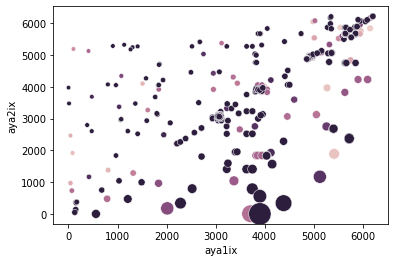

In [714]:
sns.scatterplot(data=df[df.cosine_similarity>=.9], x="aya1ix", y="aya2ix", 
                #alpha=0.5, 
                hue="cosine_similarity", 
                size="ratio",
                sizes=(20, 500),
                legend=False)

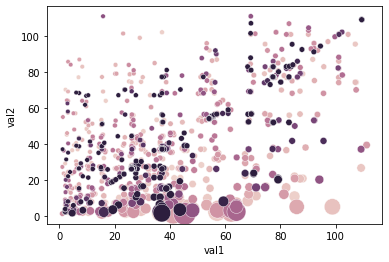

In [715]:
sns.scatterplot(data=df, x="val1", y="val2",  #df[(df.cosine_similarity>=1)&(df.sura1!=df.sura2)]
                #alpha=0.5, 
                hue="cosine_similarity", 
                size="ratio",
                sizes=(20, 500),
                legend=False)

In [102]:
toc = pd.read_csv(path + os.path.sep + 'ref' + os.path.sep + 'toc.csv')#, index_col=0)
df = df[df.cosine_similarity>=threshold].merge(toc.rename(columns={'No.':'sura1'}),on='sura1') \
    .rename(columns={'Name Arabic':'name1_ar',
                     'Name':'name1',
                     'English Meaning':'name1_meaning',
                     'No of verses':'totalayaat1',
                     'Place':'place1',
                     'Chronology':'chron1'}) \
    .merge(toc.rename(columns={'No.':'sura2'}),on='sura2') \
    .rename(columns={'Name Arabic':'name2_ar',
                     'Name':'name2',
                     'English Meaning':'name2_meaning',
                     'No of verses':'totalayaat2',
                     'Place':'place2',
                     'Chronology':'chron2'})
df = df[['aya1ix', 'aya2ix', 'cosine_similarity', 'sura1', 'aya1', 'sura2', 'aya2','textaya1','textaya2',
       'lemmaaya1', 'lemmaaya2', 'name1', 'name2', 'name1_ar', 'name2_ar', 'name1_meaning', 'name2_meaning', 
             'totalayaat1',  'totalayaat2', 'place1', 'place2', 'chron1', 'chron2']]
df.cosine_similarity = df.cosine_similarity.round(3)
df.sort_values(['cosine_similarity','sura1','aya1'],ascending=False) \
    .to_csv(path+os.path.sep+'data'+os.path.sep+'cosine_similarity_intellect_ayaat+'+str(threshold)+'_name_place_chron.csv')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 277
Data columns (total 23 columns):
aya1ix               278 non-null int64
aya2ix               278 non-null int64
cosine_similarity    278 non-null float64
sura1                278 non-null int64
aya1                 278 non-null int64
sura2                278 non-null int64
aya2                 278 non-null int64
textaya1             278 non-null object
textaya2             278 non-null object
lemmaaya1            278 non-null object
lemmaaya2            278 non-null object
name1                278 non-null object
name2                278 non-null object
name1_ar             278 non-null object
name2_ar             278 non-null object
name1_meaning        278 non-null object
name2_meaning        278 non-null object
totalayaat1          278 non-null int64
totalayaat2          278 non-null int64
place1               278 non-null object
place2               278 non-null object
chron1               278 non-null int64
c

In [964]:
df[(df.sura1 != df.sura2)&(df.cosine_similarity>=.8)&(df.place1!=df.place2)]

,aya1ix,aya2ix,cosine_similarity,sura1,aya1,sura2,aya2,textaya1,textaya2,lemmaaya1,...,name1_ar,name2_ar,name1_meaning,name2_meaning,totalayaat1,totalayaat2,place1,place2,chron1,chron2
152,42,977,0.817,2,36,7,24,فَأَزَلَّهُمَا ٱلشَّيْطَٰنُ عَنْهَا فَأَخْرَجَ...,قَالَ ٱهْبِطُوا۟ بَعْضُكُمْ لِبَعْضٍ عَدُوٌّ و...,>azal~a $ayoTa`n Ean >axoraja minmaA kaAna fiY...,...,البقرة,الأعراف,The Cow,The Heights,286,206,Medinan,Meccan,87,39
153,65,1115,0.868,2,59,7,162,فَبَدَّلَ ٱلَّذِينَ ظَلَمُوا۟ قَوْلًا غَيْرَ ٱ...,فَبَدَّلَ ٱلَّذِينَ ظَلَمُوا۟ مِنْهُمْ قَوْلًا...,bad~ala {l~a*iY Zalama qawol gayor {l~a*iY qaA...,...,البقرة,الأعراف,The Cow,The Heights,286,206,Medinan,Meccan,87,39
154,41,972,0.917,2,35,7,19,وَقُلْنَا يَٰٓـَٔادَمُ ٱسْكُنْ أَنتَ وَزَوْجُك...,وَيَٰٓـَٔادَمُ ٱسْكُنْ أَنتَ وَزَوْجُكَ ٱلْجَن...,qaAla A^dam sakana zawoj jan~ap >akala min ra...,...,البقرة,الأعراف,The Cow,The Heights,286,206,Medinan,Meccan,87,39
358,2660,3012,0.818,22,66,26,81,وَهُوَ ٱلَّذِىٓ أَحْيَاكُمْ ثُمَّ يُمِيتُكُمْ ...,وَٱلَّذِى يُمِيتُنِى ثُمَّ يُحْيِينِ,{l~a*iY >aHoyaA vum~ >amaAta vum~ >aHoyaA <in...,...,الحج,الشعراء,The Pilgrimage,The Poets,78,227,Medinan,Meccan,103,47
445,488,4136,0.846,3,196,40,4,لَا يَغُرَّنَّكَ تَقَلُّبُ ٱلَّذِينَ كَفَرُوا۟...,مَا يُجَٰدِلُ فِىٓ ءَايَٰتِ ٱللَّهِ إِلَّا ٱلّ...,laA gar~a taqal~ub {l~a*iY kafara fiY balad,...,آل عمران,غافر,The House of Joachim,The Forgiver,200,85,Medinan,Meccan,89,60
512,5216,3508,0.826,64,18,32,6,عَٰلِمُ ٱلْغَيْبِ وَٱلشَّهَٰدَةِ ٱلْعَزِيزُ ٱل...,ذَٰلِكَ عَٰلِمُ ٱلْغَيْبِ وَٱلشَّهَٰدَةِ ٱلْعَ...,Ea`lim gayob $aha`dap Eaziyz Hakiym,...,التغابن,السجدة,Mutual Disposession,Prostration,18,30,Medinan,Meccan,108,75
530,1094,55,0.810,7,141,2,49,وَإِذْ أَنجَيْنَٰكُم مِّنْ ءَالِ فِرْعَوْنَ يَ...,وَإِذْ نَجَّيْنَٰكُم مِّنْ ءَالِ فِرْعَوْنَ يَ...,<i* >anjaY` min 'aAl firoEawon yasuwmu suw^' E...,...,الأعراف,البقرة,The Heights,The Cow,206,286,Meccan,Medinan,39,87
531,989,45,0.821,7,36,2,39,وَٱلَّذِينَ كَذَّبُوا۟ بِـَٔايَٰتِنَا وَٱسْتَك...,وَٱلَّذِينَ كَفَرُوا۟ وَكَذَّبُوا۟ بِـَٔايَٰتِ...,{l~a*iY ka*~aba 'aAyap {sotakobara Ean >uwla`^...,...,الأعراف,البقرة,The Heights,The Cow,206,286,Meccan,Medinan,39,87
547,2015,179,0.966,16,115,2,173,إِنَّمَا حَرَّمَ عَلَيْكُمُ ٱلْمَيْتَةَ وَٱلدّ...,إِنَّمَا حَرَّمَ عَلَيْكُمُ ٱلْمَيْتَةَ وَٱلدّ...,<in~maA Har~ama EalaY` mayotap dam laHom xinzi...,...,النحل,البقرة,The Bee,The Cow,128,286,Meccan,Medinan,70,87
551,3714,12,0.945,36,10,2,6,وَسَوَآءٌ عَلَيْهِمْ ءَأَنذَرْتَهُمْ أَمْ لَم...,إِنَّ ٱلَّذِينَ كَفَرُوا۟ سَوَآءٌ عَلَيْهِمْ ...,sawaA^' EalaY` >an*ara >am lam >an*ara laA 'aA...,...,يس,البقرة,Ya Seen,The Cow,83,286,Meccan,Medinan,41,87


In [928]:
ayaat_subset = set(df.aya1ix.unique()) | set(df.aya2ix.unique())
ayaat_subset = sorted(list(ayaat_subset))

In [929]:
tchm = testcos.loc[ayaat_subset,ayaat_subset]

In [931]:
tchm

,1,5,9,11,12,33,40,41,42,45,...,6167,6170,6171,6186,6199,6208,6209,6210,6211,6217
1,1.000000,0.0,0.000000,0.073835,0.000000,0.050980,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.0,1.000000,0.000000,0.081065,0.021753,0.00000,0.000000,0.072921,0.036608,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,0.073835,0.0,0.000000,1.000000,0.031417,0.152111,0.01502,0.029055,0.000000,0.231618,...,0.0,0.0,0.0,0.056401,0.040044,0.000000,0.000000,0.000000,0.000000,0.000000
12,0.000000,0.0,0.081065,0.031417,1.000000,0.018490,0.00000,0.018370,0.000000,0.109275,...,0.0,0.0,0.0,0.084564,0.062322,0.037730,0.042269,0.042269,0.042269,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,0.000000,0.0,0.000000,0.000000,0.037730,0.023725,0.00000,0.029093,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.048090,1.000000,0.621012,0.621012,0.621012,0.086072
6209,0.000000,0.0,0.000000,0.000000,0.042269,0.026579,0.00000,0.032594,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.053876,0.621012,1.000000,1.000000,1.000000,0.096428
6210,0.000000,0.0,0.000000,0.000000,0.042269,0.026579,0.00000,0.032594,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.053876,0.621012,1.000000,1.000000,1.000000,0.096428
6211,0.000000,0.0,0.000000,0.000000,0.042269,0.026579,0.00000,0.032594,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.053876,0.621012,1.000000,1.000000,1.000000,0.096428


testcos.mask(testcos>0.5,1,inplace=True)
testcos.mask(testcos<=0.5,0,inplace=True)

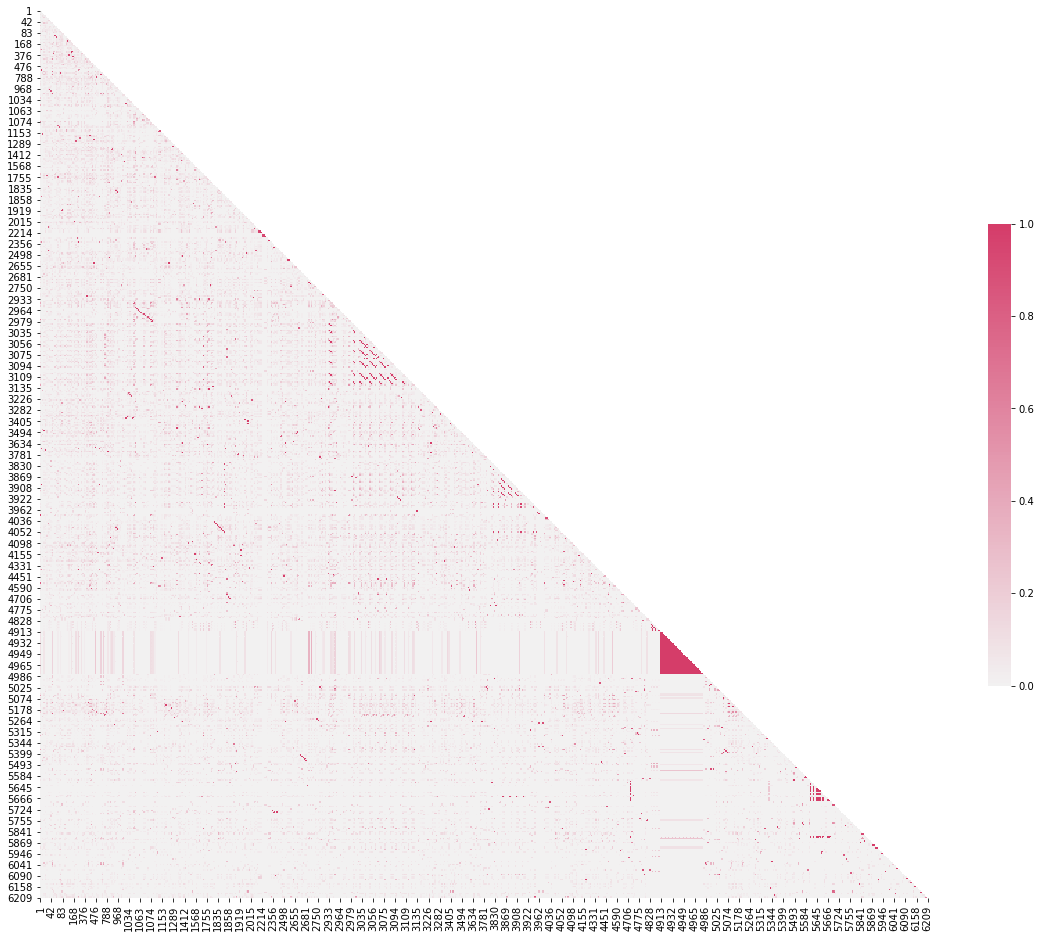

In [938]:
import seaborn as sns 
mask = np.triu(np.ones_like(tchm, dtype=bool))
f, ax = plt.subplots(figsize=(20, 17))
cmap = sns.diverging_palette(359, 0, as_cmap=True)

sns.heatmap(tchm, mask=mask, cmap=cmap, vmax=1, center=0,
    square=True, cbar_kws={"shrink": .5})
